In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('dataset_preprocessed_edited.csv')
df.head()

,cell,8/2/2021 0:00,8/9/2021 0:00,8/16/2021 0:00,8/23/2021 0:00,8/30/2021 0:00,9/6/2021 0:00,9/13/2021 0:00,9/20/2021 0:00,9/27/2021 0:00,...,11/29/2021,12/6/2021 0:00,12/13/2021 0:00,12/20/2021 0:00,12/27/2021 0:00,1/3/2022 0:00,1/10/2022,1/17/2022,1/24/2022,Unnamed: 27
0,Analathivu-JA0096-L_J,37.325053,47.555763,53.546126,57.351860,38.532082,45.822848,60.026992,24.332831,27.234566,...,59.650554,111.594306,92.277540,53.088803,53.170363,55.779391,113.285339,141.249729,103.263605,NaN
1,Analathivu-JA0096-L_K,48.013939,22.157231,47.635982,57.116461,47.710829,46.543270,85.498955,71.118141,67.714734,...,104.042072,99.469771,70.915404,105.170219,95.663553,74.603630,84.692269,54.319317,83.767563,NaN
2,Analathivu-JA0096-L_L,60.782547,62.884417,48.829323,73.811601,97.482040,97.584452,112.881538,116.810870,89.639410,...,99.626048,114.758399,100.711665,81.093644,74.157093,70.142641,97.006285,74.229753,71.420710,NaN
3,Balangoda_Town-RA0030-L_A,571.743442,668.642581,698.344362,354.665585,452.797190,427.173885,505.102543,515.280631,608.672360,...,690.497217,678.192799,658.953835,775.830415,752.557880,668.884803,621.260210,643.586437,588.190187,NaN
4,Balangoda_Town-RA0030-L_R,756.312211,682.140818,730.266742,840.954790,922.056087,863.359955,808.667509,755.822263,768.870780,...,663.549965,717.466394,754.635304,726.841493,718.045633,617.992789,658.666277,680.725623,569.184986,NaN


In [ ]:
df = df.iloc[:, 1:27]

In [ ]:
df.head()

,8/2/2021 0:00,8/9/2021 0:00,8/16/2021 0:00,8/23/2021 0:00,8/30/2021 0:00,9/6/2021 0:00,9/13/2021 0:00,9/20/2021 0:00,9/27/2021 0:00,10/4/2021 0:00,...,11/22/2021,11/29/2021,12/6/2021 0:00,12/13/2021 0:00,12/20/2021 0:00,12/27/2021 0:00,1/3/2022 0:00,1/10/2022,1/17/2022,1/24/2022
0,37.325053,47.555763,53.546126,57.351860,38.532082,45.822848,60.026992,24.332831,27.234566,42.730735,...,63.276963,59.650554,111.594306,92.277540,53.088803,53.170363,55.779391,113.285339,141.249729,103.263605
1,48.013939,22.157231,47.635982,57.116461,47.710829,46.543270,85.498955,71.118141,67.714734,49.202347,...,94.657885,104.042072,99.469771,70.915404,105.170219,95.663553,74.603630,84.692269,54.319317,83.767563
2,60.782547,62.884417,48.829323,73.811601,97.482040,97.584452,112.881538,116.810870,89.639410,102.902530,...,72.581689,99.626048,114.758399,100.711665,81.093644,74.157093,70.142641,97.006285,74.229753,71.420710
3,571.743442,668.642581,698.344362,354.665585,452.797190,427.173885,505.102543,515.280631,608.672360,636.987589,...,645.961560,690.497217,678.192799,658.953835,775.830415,752.557880,668.884803,621.260210,643.586437,588.190187
4,756.312211,682.140818,730.266742,840.954790,922.056087,863.359955,808.667509,755.822263,768.870780,744.210725,...,687.233728,663.549965,717.466394,754.635304,726.841493,718.045633,617.992789,658.666277,680.725623,569.184986


In [ ]:
df = df.sum(axis=0)
df.index = pd.to_datetime(df.index)
df.head(27)

2021-08-02    10527.026460
2021-08-09    11105.646769
2021-08-16    11228.112952
2021-08-23    12102.234428
2021-08-30    12753.436009
2021-09-06    12469.896544
2021-09-13    12622.369202
2021-09-20    12353.015546
2021-09-27    12352.152266
2021-10-04    12131.512191
2021-10-11    12684.105123
2021-10-18    11590.321250
2021-10-25    12110.635584
2021-11-01    11712.967430
2021-11-08    11918.527879
2021-11-15    11369.149407
2021-11-22    10872.551076
2021-11-29    10009.273037
2021-12-06    10484.631106
2021-12-13    10439.509301
2021-12-20     9813.540314
2021-12-27     9756.129936
2022-01-03     9651.037165
2022-01-10     9237.765540
2022-01-17     9701.263222
2022-01-24     9626.923526
dtype: float64

In [ ]:
df.index = pd.to_datetime(df.index)
df = pd.read_csv('cummulative_daily_traffic.csv')
print(df)

               Date  DL_Traffic_GByte
0     8/2/2021 0:00      10527.026460
1     8/9/2021 0:00      11105.646770
2    8/16/2021 0:00      11228.112950
3    8/23/2021 0:00      12102.234430
4    8/30/2021 0:00      12753.436010
5     9/6/2021 0:00      12469.896540
6    9/13/2021 0:00      12622.369200
7    9/20/2021 0:00      12353.015550
8    9/27/2021 0:00      12131.512190
9    10/4/2021 0:00      12131.512190
10  10/11/2021 0:00      12684.105120
11  10/18/2021 0:00      11590.321250
12  10/25/2021 0:00      12110.635580
13        11/1/2021      11712.967430
14        11/8/2021      11918.527880
15       11/15/2021      11369.149410
16       11/22/2021      10872.551080
17       11/29/2021      10009.273040
18   12/6/2021 0:00      10484.631110
19  12/13/2021 0:00      10439.509300
20  12/20/2021 0:00       9813.540314
21  12/27/2021 0:00       9756.129936
22    1/3/2022 0:00       9651.037165
23        1/10/2022       9237.765540
24        1/17/2022       9701.263222
25        1/

In [ ]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df

,DL_Traffic_GByte
Date,
2021-08-02,10527.026460
2021-08-09,11105.646770
2021-08-16,11228.112950
2021-08-23,12102.234430
2021-08-30,12753.436010
2021-09-06,12469.896540
2021-09-13,12622.369200
2021-09-20,12353.015550
2021-09-27,12131.512190


In [ ]:
df.describe()

,DL_Traffic_GByte
count,26.000000
mean,11169.349738
std,1130.501085
min,9237.765540
25%,10116.832105
50%,11298.631180
75%,12126.293037
max,12753.436010


<AxesSubplot:xlabel='Date'>

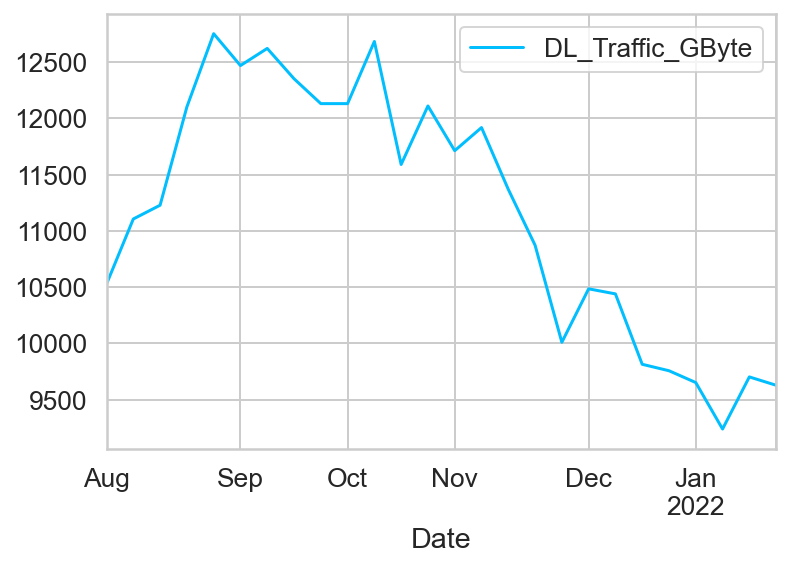

In [ ]:
df.plot()

In [ ]:
train, test = df[:-7], df[-7:]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
n_input =7
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=7)

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
2/2 [==============================] - 1s 9ms/step - loss: 0.4531
Epoch 2/90
2/2 [==============================] - 0s 16ms/step - loss: 0.4125
Epoch 3/90
2/2 [==============================] - 0s 16ms/step - loss: 0.3575
Epoch 4/90
2/2 [==============================] - 0s 8ms/step - loss: 0.2975
Epoch 5/90
2/2 [==============================] - 0s 8ms/step - loss: 0.2590
Epoch 6/90
2/2 [==============================] - 0s 16ms/step - loss: 0.2084
Epoch 7/90
2/2 [==============================] - 0s 8ms/step - loss: 0.1790
Epoch 8/90
2/2 [==============================] - 0s 8ms/step - loss: 0.1413
Epoch 9/90
2/2 [==============================] - 0s 8ms/step - loss: 0.0929
Epoch 10/90
2/2 [==============================] - 0s 16ms/step - loss: 0.0677
Epoch 11/90
2/2 [==============================] - 0s 16ms/step - loss: 0.0687
Epoch 12/90
2/2 [==============================] - 0s 8ms/step - loss: 0.0785
Epoch 13/90
2/2 [==============================] - 0s 16ms/step - lo

In [ ]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


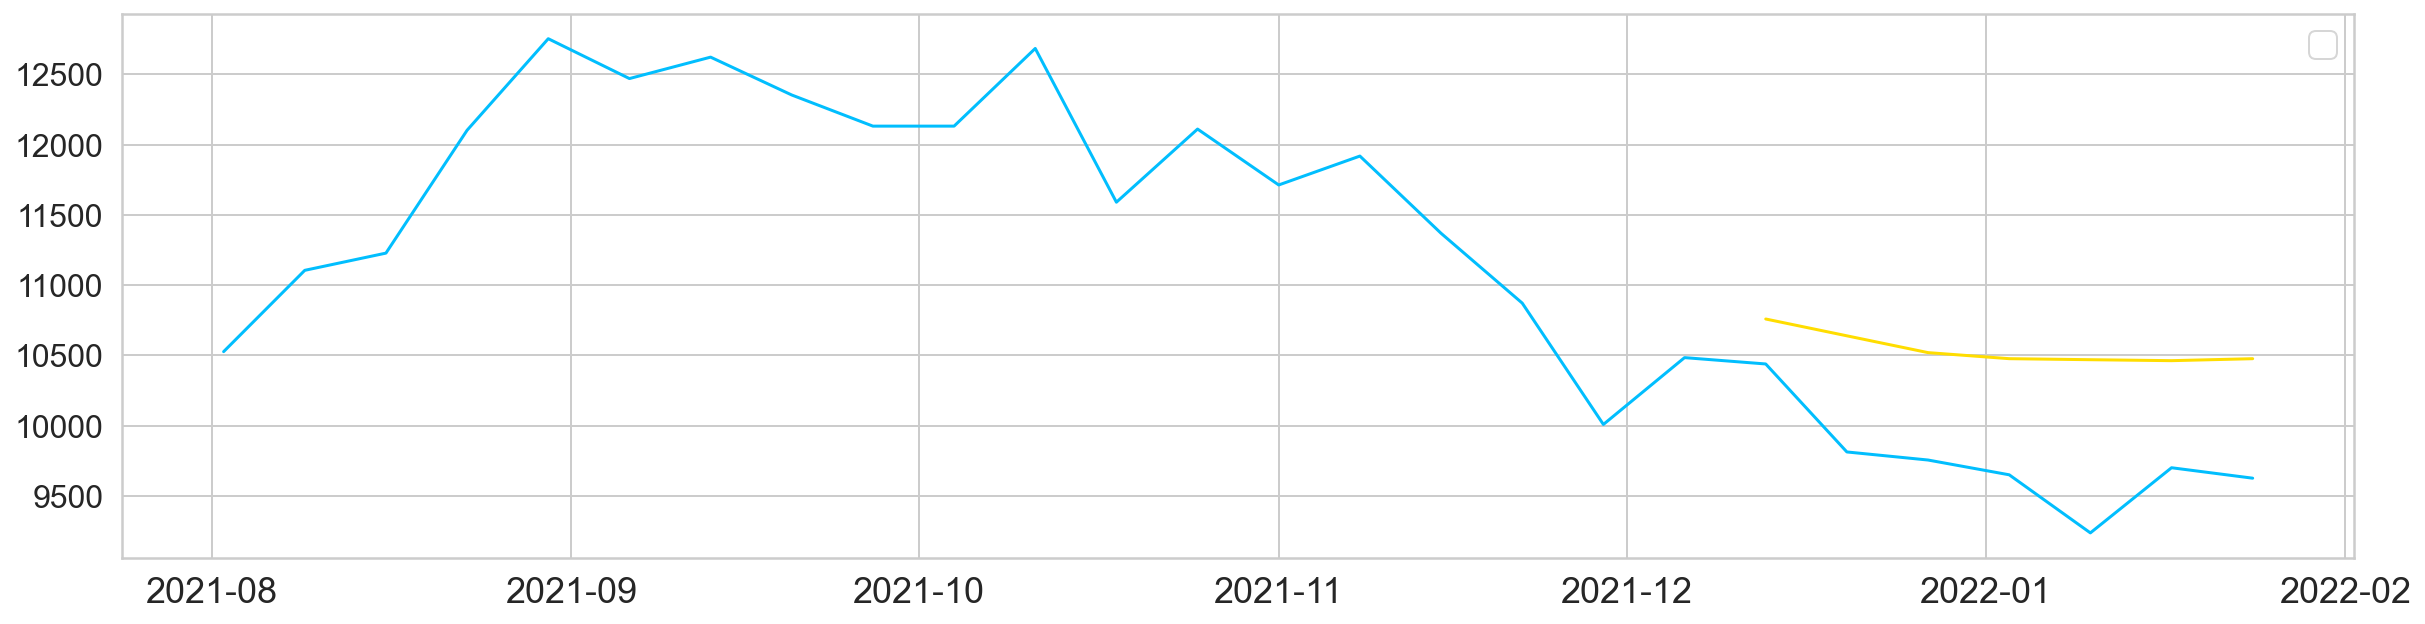

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['DL_Traffic_GByte'])
plt.plot(df_test.index, df_test['Prediction'])
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['DL_Traffic_GByte'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

<AxesSubplot:xlabel='Date'>

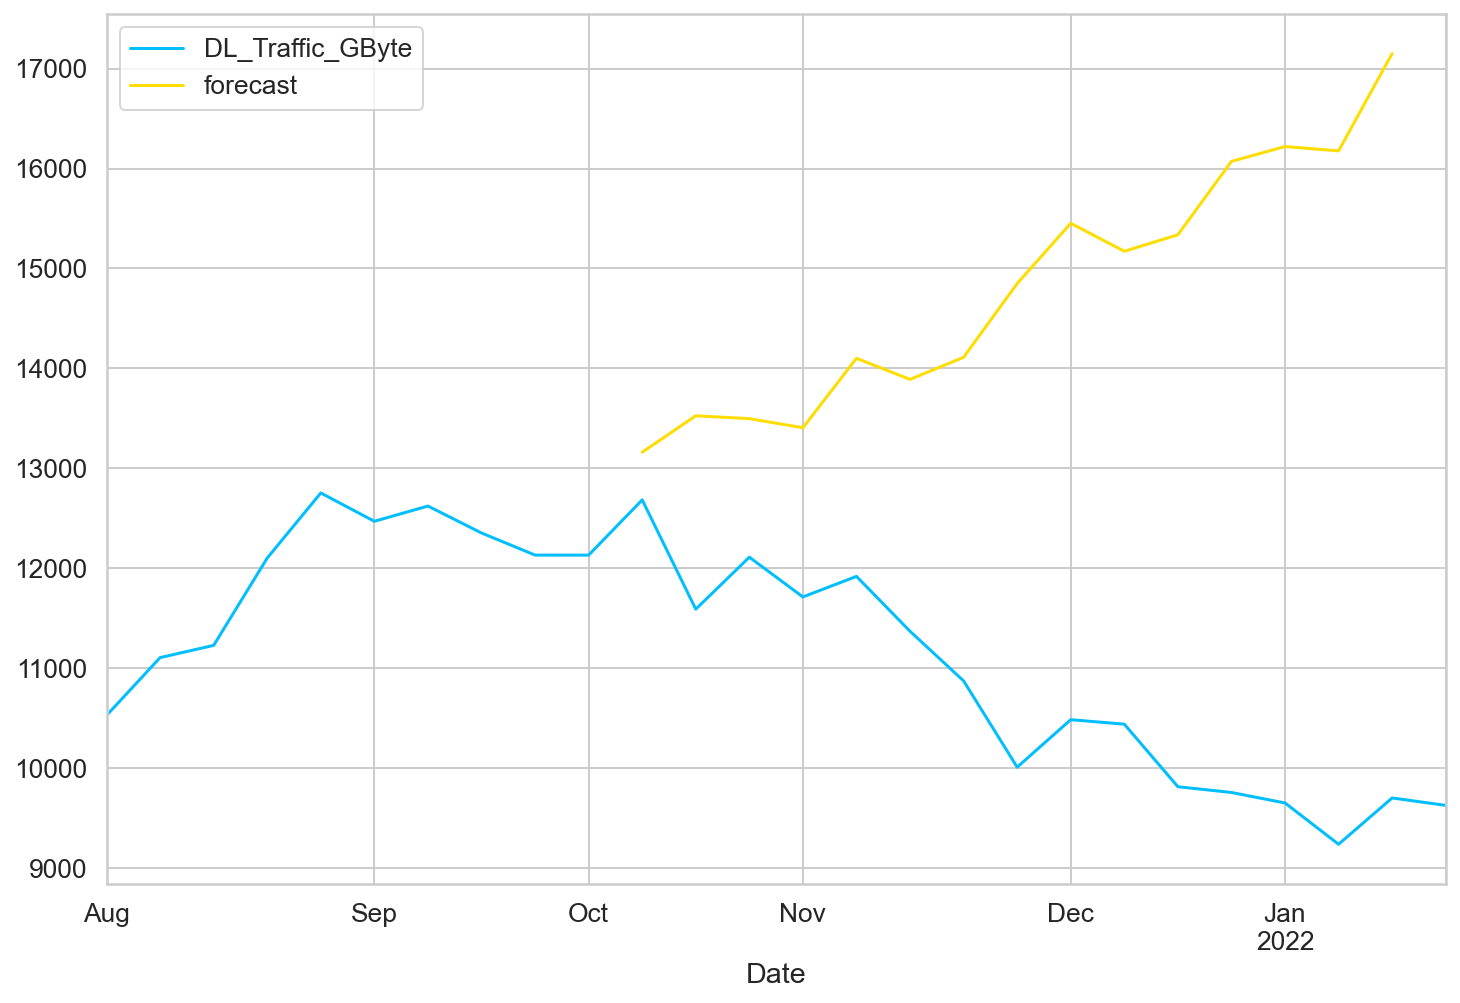

In [ ]:
df['forecast']=results.predict(start=10,end=24,dynamic=True)
df[['DL_Traffic_GByte','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(weeks=x)for x in range(0,28)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.head()

,DL_Traffic_GByte,forecast
2022-01-31,NaN,NaN
2022-02-07,NaN,NaN
2022-02-14,NaN,NaN
2022-02-21,NaN,NaN
2022-02-28,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

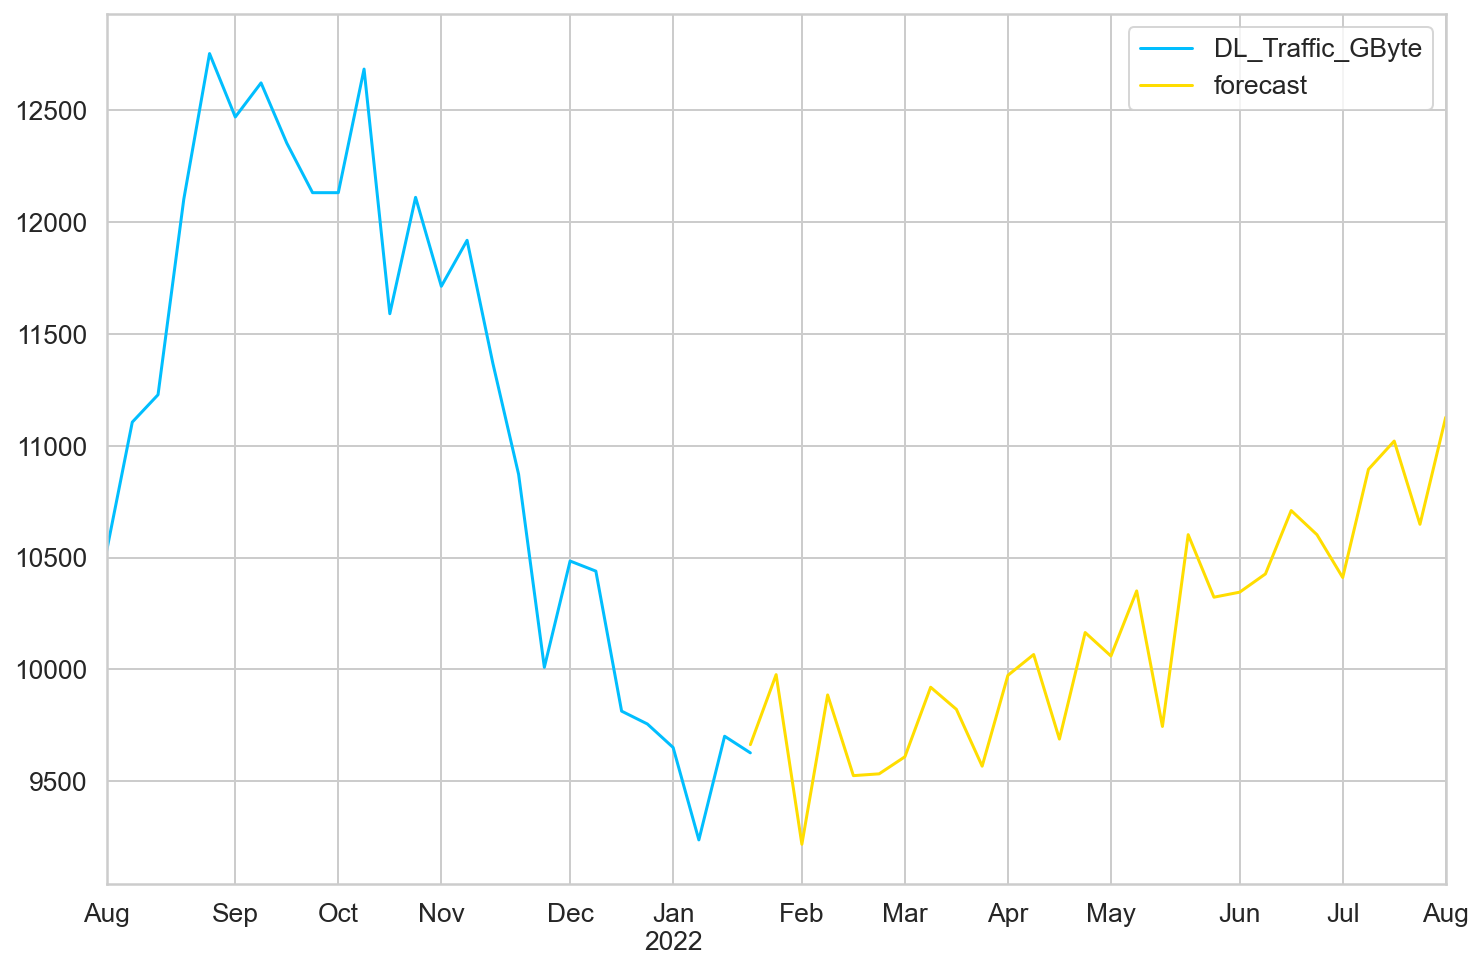

In [ ]:
future_df['forecast'] = results.predict(start = 25, end = 52,dynamic= True)  
future_df[['DL_Traffic_GByte', 'forecast']].plot(figsize=(12, 8)) 